In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import numpy as np 


customer churn prediction mean customer classes the account they go with different bank and the previous bank want to know about the reason why this happen that customer is going to the other bank 

# Data exploration is a crucial step in the data analysis process, where you investigate and understand the characteristics of your dataset. It involves summarizing, visualizing, and gaining insights from the data to prepare for further analysis. Here are some common steps and techniques involved in data exploration:




In [2]:
df=pd.read_csv("telecommuniation.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# here when we are building the model for us the cutomer id is useless there is no any use of customer id so we can drop the customer id 

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

In [7]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# here above we have noticed that total charges is object and our monthly charges is float 

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# here we have seen that the total charges values are in string that is the values are like in '29.85'
# so we have to convert it ito the float value 

In [11]:
df.shape

(7043, 20)

In [12]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


.isnull(): After converting the 'TotalCharges' column to numeric values with 'NaN' for non-convertible values, .isnull() is applied to create a Boolean mask. This mask will have True for rows where the 'TotalCharges' column contains NaN (indicating missing or non-convertible values) and False for rows with valid numeric values.

In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
#df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='raise')
# The 'errors' parameter set to 'coerce' will replace non-convertible values with NaN
# If you want to raise an error for non-convertible values, you can use errors='raise' 


In [16]:
df.loc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
df.shape

(7043, 20)

In [20]:
df.loc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
df=df.dropna(subset=['TotalCharges'])

In [24]:
df.shape

(7032, 20)

In [25]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# now we do the visualization lets first saw about the tenure 

In [26]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [27]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [28]:
df[df.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

# aboue are the person or cutormer which are not leaving the company 

In [29]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'visualizing tenure ')

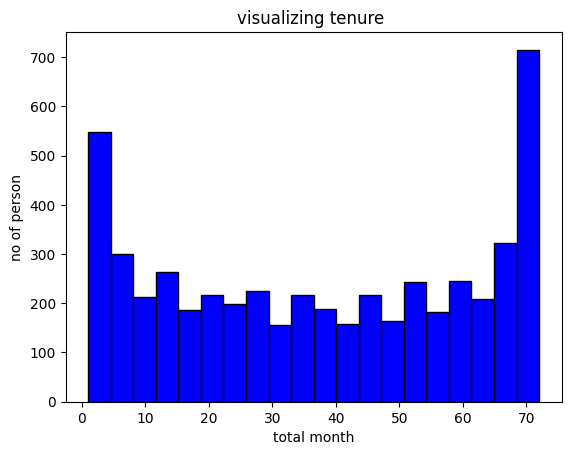

In [30]:
plt.hist(df[df.Churn=='No'].tenure, bins=20, color='blue', edgecolor='black')
plt.xlabel('total month')
plt.ylabel('no of person')
plt.title('visualizing tenure ')

# above graph is a visuzalization of the person which are not leaving the company with the x axis is showing how month they have with the company and the y axis is showing the total number of person 

Text(0.5, 1.0, 'visualizing tenure ')

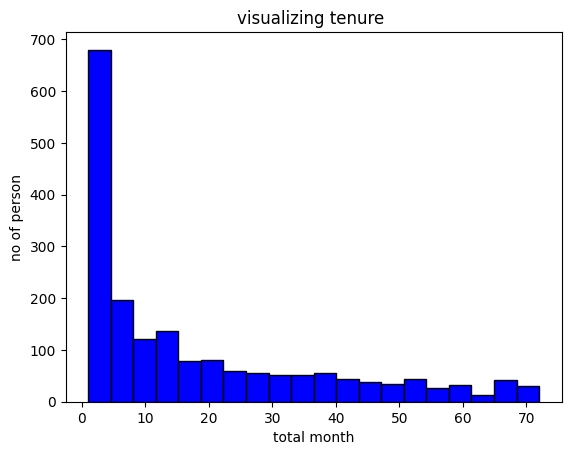

In [31]:
plt.hist(df[df.Churn=='Yes'].tenure, bins=20, color='blue', edgecolor='black')
plt.xlabel('total month')
plt.ylabel('no of person')
plt.title('visualizing tenure ')

# the above graph is showing that the how the person is leaving with the total month of service in the x axis and total person in the y axis 

Text(0.5, 1.0, 'visualizing tenure ')

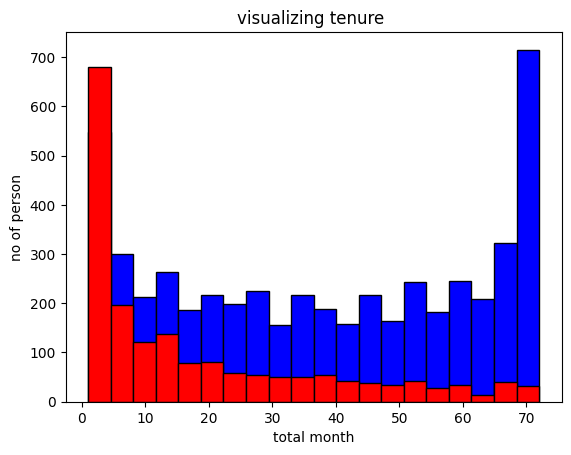

In [32]:
plt.hist(df[df.Churn=='No'].tenure, bins=20, color='blue', edgecolor='black')
plt.hist(df[df.Churn=='Yes'].tenure, bins=20, color='red', edgecolor='black')
plt.xlabel('total month')
plt.ylabel('no of person')
plt.title('visualizing tenure ')

# here we have merge the both the histogram so we can see the trends 
# here the red color show the person is leaving and the blue color show the person is not leaving 
# so we have noticed that the the person which are in has less month in the company are mostly leaving as the time goes the leaving rate is decreasing 

# churn_yes mean the person is in the company 
# churn_no mean the person is leave the company last month 

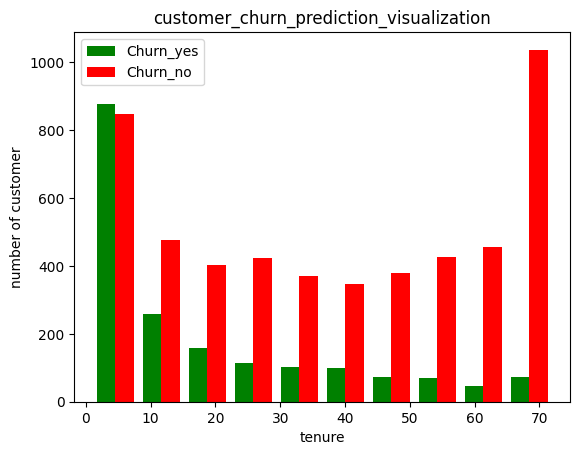

In [33]:
df_Churn_no=df[df.Churn=='No'].tenure
df_Churn_yes=df[df.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("number of customer")
plt.title("customer_churn_prediction_visualization")
plt.hist([df_Churn_yes,df_Churn_no],color=['green','red'],label=['Churn_yes','Churn_no'])
plt.legend()

# now we are visualizing with the help of monthly charges 

In [34]:
df.MonthlyCharges.unique().max()

118.75

In [35]:
df.MonthlyCharges.unique().min()

18.25

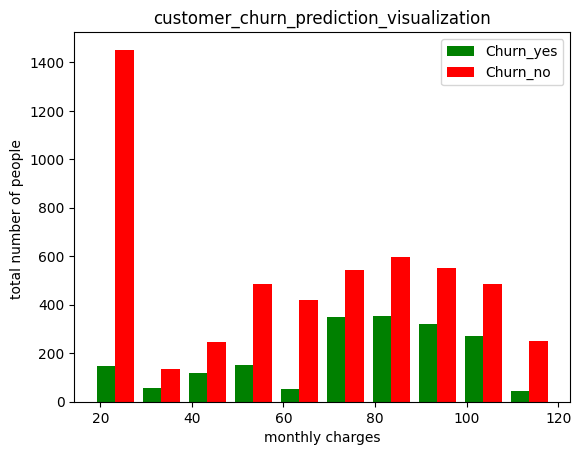

In [36]:
df_Churn_no=df[df.Churn=='No'].MonthlyCharges
df_Churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel("monthly charges")
plt.ylabel("total number of people ")
plt.title("customer_churn_prediction_visualization")
plt.hist([df_Churn_yes,df_Churn_no],color=['green','red'],label=['Churn_yes','Churn_no'])
plt.legend()

# how to run for loop in every coloum 

In [37]:
def print_unique_value_coloum(df):
    for col in df:
        if(df[col].dtype==object):
            print(f'{col}: {df[col].unique()}') 

print_unique_value_coloum(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [38]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1968\43847266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service','No',inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_1968\43847266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service','No',inplace=True)


In [40]:
print_unique_value_coloum(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


# replacing yes and no value to 1 and 0 for machine learning model 

In [41]:
yes_or_no=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
           'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_or_no:
    df[col].replace({'Yes':1,'No':0},inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_1968\167726273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace({'Yes':1,'No':0},inplace=True)


In [42]:
for col in yes_or_no:
    print(f'{col}: {df[col].unique()}')

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


In [43]:
print_unique_value_coloum(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [45]:
df['gender'].replace({'Female' : 1 ,'Male' : 0},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1968\721132964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Female' : 1 ,'Male' : 0},inplace=True)


In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


# now upto here we have done the 50 persent of work 


# now we will do one hot encoding for this we can use pandas get dummies variable 

In [47]:
pd.get_dummies(data=df,columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,True,False,False
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,True,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,True,False,False
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,True,False,False
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,False,True,False
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,True,False,False
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,False,True,False


In [48]:
pd.get_dummies(data=df,columns=['Contract','PaymentMethod'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,DSL,0,1,...,29.85,29.85,0,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,DSL,1,0,...,56.95,1889.50,0,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,DSL,1,1,...,53.85,108.15,1,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,DSL,1,0,...,42.30,1840.75,0,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,...,84.80,1990.50,0,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,Fiber optic,0,1,...,103.20,7362.90,0,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,DSL,1,0,...,29.60,346.45,0,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,Fiber optic,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
df2=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [51]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [52]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4959,1,0,1,1,1,1,0,0,0,0,...,False,False,True,True,False,False,False,True,False,False
709,0,0,1,1,29,1,1,0,1,1,...,True,False,False,True,False,False,False,True,False,False
3451,0,1,1,0,65,1,0,0,0,0,...,False,True,False,False,True,False,True,False,False,False


In [53]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

# in deep learning it is important to scale here mostly our data is scaled expcet monthly charges so we have to scale the monthly charges 

In [54]:
df2.iloc[4]

gender                                          1
SeniorCitizen                                   0
Partner                                         0
Dependents                                      0
tenure                                          2
PhoneService                                    1
MultipleLines                                   0
OnlineSecurity                                  0
OnlineBackup                                    0
DeviceProtection                                0
TechSupport                                     0
StreamingTV                                     0
StreamingMovies                                 0
PaperlessBilling                                1
MonthlyCharges                               70.7
TotalCharges                               151.65
Churn                                           1
InternetService_DSL                         False
InternetService_Fiber optic                  True
InternetService_No                          False


In [55]:
col_to_scale=['tenure','TotalCharges','MonthlyCharges']
# these are the thing which we want to scale 

# above are the coloumns which are not scalled so we want to scalled for thos we will min max scaler from the sklearn 

In [56]:
from sklearn.preprocessing import MinMaxScaler


In [57]:
scaler = MinMaxScaler()

In [58]:
df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])

In [59]:
df2.iloc[45]

gender                                            1
SeniorCitizen                                     0
Partner                                           0
Dependents                                        0
tenure                                     0.676056
PhoneService                                      1
MultipleLines                                     1
OnlineSecurity                                    0
OnlineBackup                                      0
DeviceProtection                                  0
TechSupport                                       0
StreamingTV                                       0
StreamingMovies                                   1
PaperlessBilling                                  1
MonthlyCharges                             0.659204
TotalCharges                               0.448638
Churn                                             0
InternetService_DSL                           False
InternetService_Fiber optic                    True
InternetServ

In [60]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [61]:
x = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [62]:
from sklearn.model_selection import train_test_split


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=10)

In [94]:
len(x_train)

5414

In [95]:
len(y_train)

5414

In [96]:
x_train.ndim

2

In [97]:
x_train = np.asarray(x_train).astype(np.float32)

In [98]:
x_test=np.asarray(x_test).astype(np.float32)

In [99]:
len(x_test)

1618

In [100]:
len(y_test)

1618

In [101]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
170/170 [==============================] - 7s 5ms/step - loss: 0.4939 - accuracy: 0.7564
Epoch 2/100
170/170 [==============================] - 1s 6ms/step - loss: 0.4354 - accuracy: 0.7935
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 0.4287 - accuracy: 0.7948
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 0.4259 - accuracy: 0.7972
Epoch 5/100
170/170 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.8007
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4215 - accuracy: 0.8020
Epoch 7/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.8037
Epoch 8/100
170/170 [==============================] - 1s 4ms/step - loss: 0.4173 - accuracy: 0.8051
Epoch 9/100
170/170 [==============================] - 1s 5ms/step - loss: 0.4161 - accuracy: 0.8055
Epoch 10/100
170/170 [==============================] - 1s 5ms/step - loss: 0.4147 - accura

In [102]:
model.evaluate(x_test,y_test)

51/51 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.7769


[0.4683011472225189, 0.7768850326538086]

In [103]:
yp=model.predict(x_test)
yp[:5]

51/51 [==============================] - 0s 2ms/step


array([[0.01396187],
       [0.00320753],
       [0.35175034],
       [0.18079211],
       [0.06548556]], dtype=float32)

In [104]:
y_test[:5]

5401    0
1681    0
2076    0
3359    0
6629    0
Name: Churn, dtype: int64

In [105]:
y_predicted=[]
for i in yp:
    if i >0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [106]:
y_predicted[:5]

[0, 0, 0, 0, 0]

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1194
           1       0.57      0.64      0.60       424

    accuracy                           0.78      1618
   macro avg       0.72      0.73      0.72      1618
weighted avg       0.79      0.78      0.78      1618



In [109]:
import seaborn as sn 

In [116]:
cm=confusion_matrix(y_test, y_predicted)
cm

array([[986, 208],
       [153, 271]], dtype=int64)

Text(50.722222222222214, 0.5, 'true')

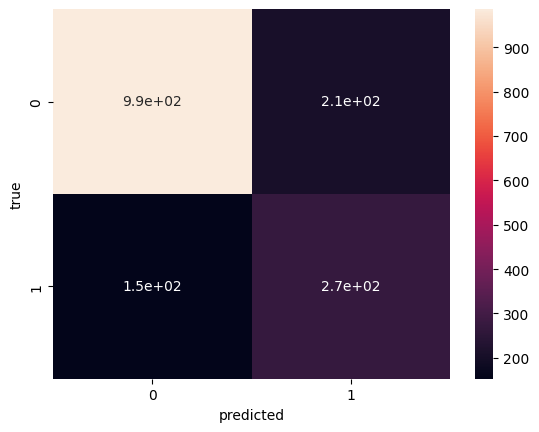

In [114]:
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("true")

# here we have calculate the accuracy using the confusion matrix 

In [117]:
(986+281)/(208+153+986+281)

0.7782555282555282

# precision for first zero and then one 



In [118]:
986/(986+153)

0.8656716417910447

In [119]:
271/(208+271)

0.5657620041753654

# recall for zero and one 

In [120]:
986/(986+208)

0.8257956448911222

In [121]:
271/(153+271)

0.6391509433962265